---
# **Análise de Fraude Finaceira**
---

Fraudes em transações financeiras são uma preocupação crescente para bancos, empresas de cartão de crédito, e consumidores. Estimativas sugerem que bilhões de dólares são perdidos anualmente devido a atividades fraudulentas, como clonagem de cartões, phishing, e outras formas de fraude digital. A aplicação de análise de dados e machine learning para a prevenção de fraudes oferece uma solução robusta e escalável para um problema que afeta milhões de pessoas em todo o mundo.

# **Objetivo**


Desenvolver um modelo preditivo baseado em machine learning capaz de detectar fraudes em transações financeiras em tempo real, minimizando falsos positivos e negativos, a fim de proteger consumidores e instituições financeiras de perdas econômicas e aumentar a segurança das transações digitais.

dados obtiveis no [kaggle](https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data/data)

# **1. Importando Bibliotecas**





In [ ]:
#analise da dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#machine learnig
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#**2.  Obtendo e conhecendo os dados**

In [ ]:
%%bash
kaggle datasets download -d chitwanmanchanda/fraudulent-transactions-data
unzip fraudulent-transactions-data.zip

 **Legenda Dos Dados**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo equivale a 1 hora. Total de passos 744 (simulação de 30 dias).


---


**type** - tipos de pagamento: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.


---


**amount** - valor da transação em moeda local.


---


**nameOrig** - cliente que iniciou a transação


---


**oldbalanceOrg** - antigo saldo antes da transação


---


**newbalanceOrig** - novo saldo após a transação


---


**nameDest** - cliente que é o destinatário da transação

---

**oldbalanceDest** - destinatário do saldo inicial antes da transação. Observe que não há informações para clientes que iniciam com M (Comerciantes).

---

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que iniciam com M (Comerciantes).

---

**isFraud** - São as transações realizadas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar assumindo o controle das contas dos clientes e tentando esvaziar os fundos transferindo para outra conta e depois sacando do sistema.


---


**isFlaggedFraud** - O modelo de negócio visa controlar transferências massivas de uma conta para outra e sinalizar tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.

In [ ]:
data=pd.read_csv("Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


verifico os metodos info() e discribe() para me introduzir aos dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data.describe(include=[object])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


verifico a existência de nulos


In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


# **3. Analise exploratória de dados (EDA)**

In [ ]:
#nome do destinatário
dm=data[data['nameDest'].str.startswith('M')]#comerciante

dc=data[data['nameDest'].str.startswith('C')]#cliente/pessoa comun

#contagem e comparação com isFraud

dm_fraud=dm[dm['isFraud']==1].value_counts()
dc_fraud=dc[dc['isFraud']==1].value_counts()

dm_fraud_count=dm_fraud.sum()
dc_fraud_count=dc_fraud.sum()

tamanho_dm = dm.shape[0]
tamanho_dc = dc.shape[0]

print(f"número de fraudes com destino a comercio {dm_fraud_count}, quantia de comerciantes totais {tamanho_dm}")
print(f"número de fraudes com destino a cliente {dc_fraud_count}, quantia de clientes totais {tamanho_dc}")


número de fraudes com destino a comercio 0, quantia de comerciantes totais 2151495
número de fraudes com destino a cliente 8213, quantia de clientes totais 4211125


percebe-se que não a fraudes envolvendo comerciantes porem isso pode ser apenas uma caracteristica deste data frame em questaõ então para manter o modelo de machine learnig generico o mesmo não incluira tal variavel.

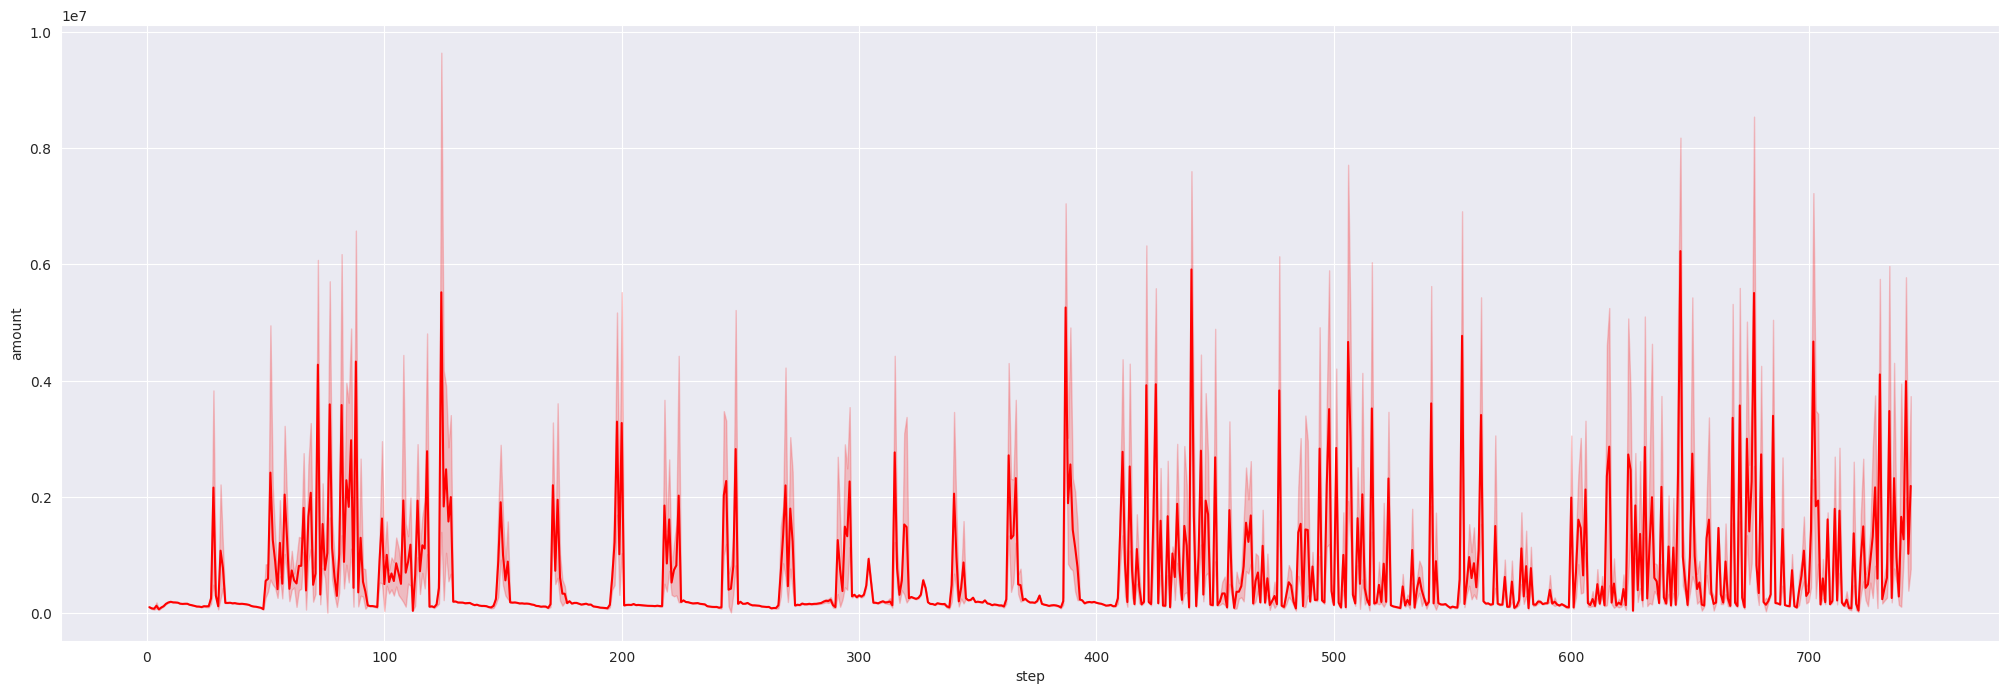

In [ ]:
#step x amount
with sns.axes_style("darkgrid"):
  plt.figure(figsize=(25, 8))
  sns.lineplot(data=data,x="step",y="amount",color="red")



o grafico não demonstra grande variância no periodo de tempo recordado pela falta de uma data de inicio de coleta dos dados a conversão para uma data utilizavel poderia induzir o modelo de machine learnig a um erro mais ainda sim deixarei essa variavel no modelo como uma linha do tempo imaginando que os dados serão analisados em grandes quantias e não por demanda.

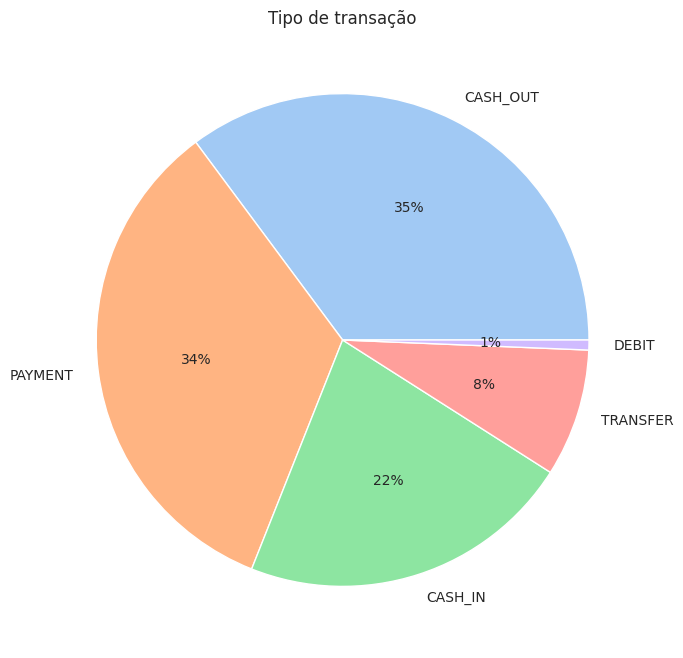

In [ ]:
#transferencias por tipo
x=data.type.value_counts()
with sns.axes_style("darkgrid"):
  colors = sns.color_palette('pastel')[0:5]
  labels = ["CASH_OUT", "PAYMENT", "CASH_IN", "TRANSFER", "DEBIT"]
  plt.figure(figsize=(14, 8))
  plt.pie(x, labels = labels, colors = colors, autopct='%.0f%%',center=(1,2))
  plt.title("Tipo de transação")

  plt.show()

analisa-se apartir deste grafico de pizza que os tipos de pagamento são relativamente enquilibrado tirando o debit e transfer os demais mantem um certo inquilibrio nas transações.

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


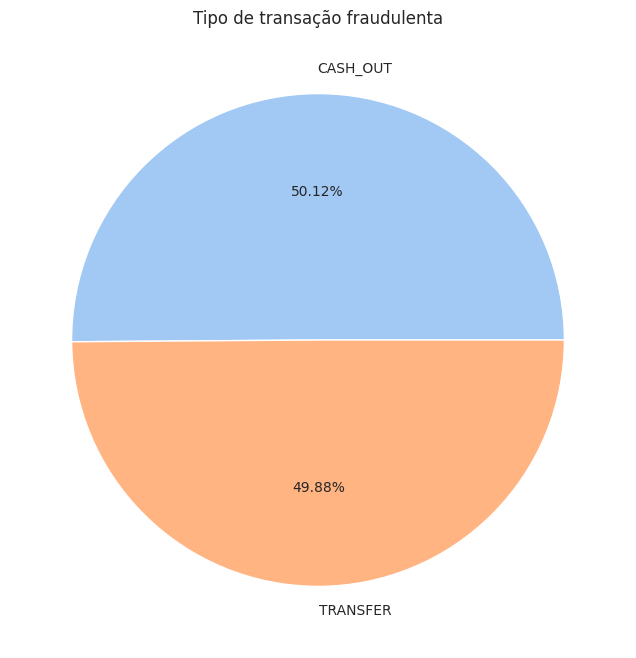

In [ ]:
# tipos de transações mais utilizados por fraudadores
fraud_type = data[data['isFraud'] == 1]['type'].value_counts()
print(fraud_type)

with sns.axes_style("darkgrid"):
  colors = sns.color_palette('pastel')[0:2]
  labels = ["CASH_OUT", "TRANSFER"]
  plt.figure(figsize=(14, 8))
  plt.pie(fraud_type, labels = labels, colors = colors, autopct='%.2f%%',center=(1,2))
  plt.title("Tipo de transação fraudulenta")

  plt.show()


é visivel que existe um metodo preferivel para os agentes fraudulentos sendo eles exclusicvos o transfer e o cash_out que seriam respectivamente transferencia e sacando.

In [ ]:
#contagems de fraude e porcentagem arredondada

fraud_contagem = data.isFraud.value_counts()
fraud_porcentagem = round(data.isFraud.value_counts()/len(data)*100,2)

fraud_r = pd.DataFrame({
    'contagem': fraud_contagem,
    'porcentual': fraud_porcentagem
})

fraud_r


,contagem,porcentual
isFraud,,
0,6354407,99.87
1,8213,0.13


percebe-se que o número de fraude é bem pequeno comparando com o numero total de transações.

In [ ]:
data["isFlaggedFraud"].value_counts() #analise da variavel flaggedfraud

,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
data.query("isFraud==1 and isFlaggedFraud==1").shape[0]

16

a variavel isFlaggedFraud possue 16 aparições "positiva" e todas elas coecidem com uma fraude porem por ser tão raro não sera incluido no modelo.

# **4. procesamento das variaveis**

In [ ]:
#removendo colunas que não serão usadas
data_limpo=data.drop(["nameOrig",
                      "isFlaggedFraud",
                      "nameDest"],axis=1)

In [ ]:
#procesamento da coluna type

data_limpo['type_cash_out_nom'] = data_limpo['type'].apply(lambda type: 1 if type == 'CASH_OUT' else 0)
data_limpo["type_cash_in_nom"]=data_limpo['type'].apply(lambda type: 1 if type == 'CASH_IN' else 0)
data_limpo["type_debit_nom"]=data_limpo['type'].apply(lambda type: 1 if type == 'DEBIT' else 0)
data_limpo["type_payment_nom"]=data_limpo['type'].apply(lambda type: 1 if type == 'PAYMENT' else 0)
data_limpo["type_transfer_nom"]=data_limpo['type'].apply(lambda type: 1 if type == 'TRANSFER' else 0)


In [ ]:
#procesamento das colunas numéricas padronização

#amount
mean = data['amount'].mean()
std = data['amount'].std()

data_limpo['amount_std'] = data['amount'].apply(lambda x: (x - mean) / std)

#step
mean = data['step'].mean()
std = data['step'].std()

data_limpo['step_std'] = data['step'].apply(lambda x: (x - mean) / std)

#oldbalanceorg
mean = data['oldbalanceOrg'].mean()
std = data['oldbalanceOrg'].std()

data_limpo['oldbalanceOrg_std'] = data['oldbalanceOrg'].apply(lambda x: (x - mean) / std)

#newbalanceorg
mean = data['newbalanceOrig'].mean()
std = data['newbalanceOrig'].std()

data_limpo['newbalanceOrig_std'] = data['newbalanceOrig'].apply(lambda x: (x - mean) / std)

#oldbalancedest
mean = data['oldbalanceDest'].mean()
std = data['oldbalanceDest'].std()

data_limpo['oldbalanceDest_std'] = data['oldbalanceDest'].apply(lambda x: (x - mean) / std)

#newbalancedest
mean = data['newbalanceDest'].mean()
std = data['newbalanceDest'].std()

data_limpo['newbalanceDest_std'] = data['newbalanceDest'].apply(lambda x: (x - mean) / std)


In [ ]:
#removendo colunas antigas
data_limpo=data_limpo.drop(["type",
                            "step",
                            "amount",
                            "oldbalanceOrg",
                            "newbalanceOrig",
                            "oldbalanceDest",
                            "newbalanceDest"],axis=1)

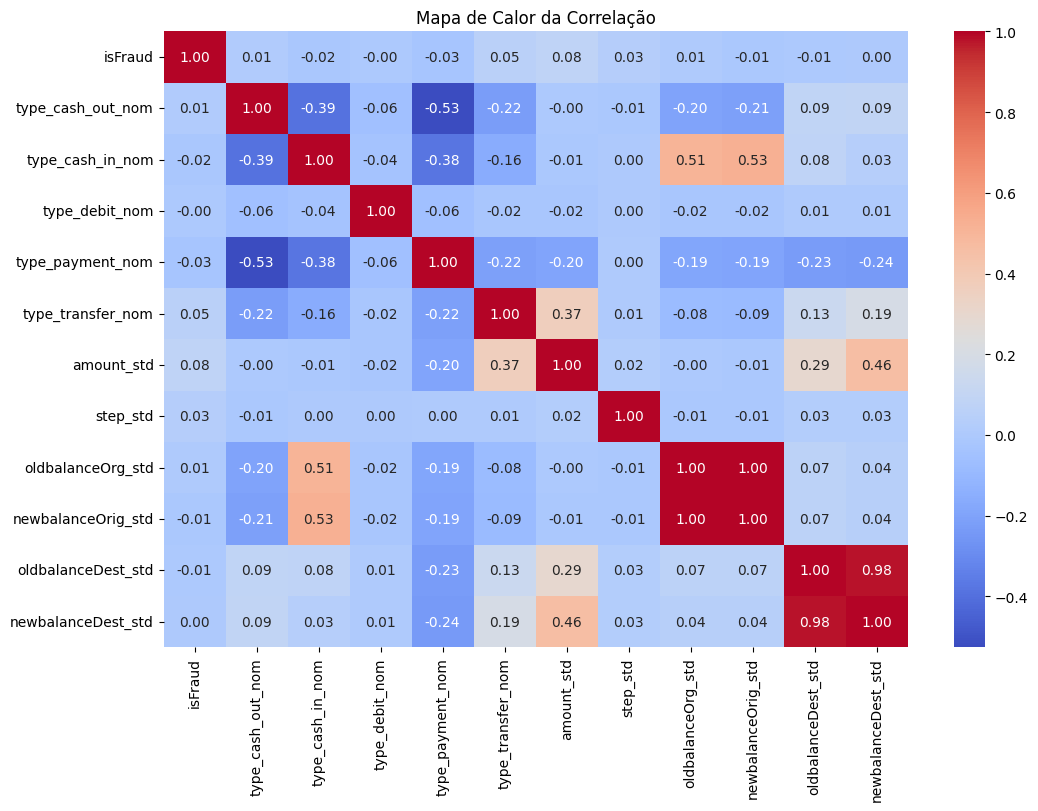

In [ ]:
# mapa de calor comparando as correlações
plt.figure(figsize=(12, 8))  # Define o tamanho da figura
sns.heatmap(data_limpo.corr(), annot=True, cmap='coolwarm', fmt=".2f") #caucula a correlação e cria o grafico
plt.title('Mapa de Calor da Correlação') #titulo
plt.show()


In [ ]:
data_limpo.head()

,isFraud,type_cash_out_nom,type_cash_in_nom,type_debit_nom,type_payment_nom,type_transfer_nom,amount_std,step_std,oldbalanceOrg_std,newbalanceOrig_std,oldbalanceDest_std,newbalanceDest_std
0,0,0,0,0,1,0,-0.281560,-1.703041,-0.229810,-0.237622,-0.323814,-0.333411
1,0,0,0,0,1,0,-0.294767,-1.703041,-0.281359,-0.285812,-0.323814,-0.333411
2,1,0,0,0,0,1,-0.297555,-1.703041,-0.288654,-0.292442,-0.323814,-0.333411
3,1,1,0,0,0,0,-0.297555,-1.703041,-0.288654,-0.292442,-0.317582,-0.333411
4,0,0,0,0,1,0,-0.278532,-1.703041,-0.274329,-0.282221,-0.323814,-0.333411


data frame preparado


# **5. Criação e treinamento do modelo arvore de decisão**

In [ ]:
#definição do modelo
modelo = DecisionTreeClassifier()

In [ ]:
#divisaõ do treinamento e teste
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data_limpo.drop(['isFraud'], axis=1),
    data_limpo['isFraud'],
    test_size=1/3,
    random_state=109
)

In [ ]:
#treinamento do modelo
model = modelo.fit(predictors_train, target_train)

In [ ]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['type_cash_out_nom', 'type_cash_in_nom', 'type_debit_nom',
        'type_payment_nom', 'type_transfer_nom', 'amount_std', 'step_std',
        'oldbalanceOrg_std', 'newbalanceOrig_std', 'oldbalanceDest_std',
        'newbalanceDest_std'], dtype=object),
 'n_features_in_': 11,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 11,
 'tree_': <sklearn.tree._tree.Tree at 0x7a01ca3968e0>}

# **6.Avaliação**

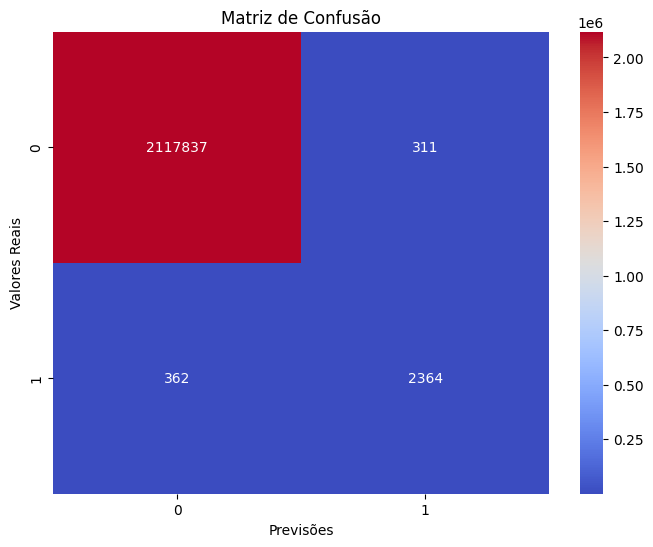

In [ ]:
#matriz de confusão
target_predicted = model.predict(predictors_test)

confusion_matrix = confusion_matrix(target_test, target_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

In [ ]:
#acurácia
accuracy = accuracy_score(target_test, target_predicted)
print(round(accuracy*100,2),"%")

99.97 %


# **conclusão**

o modelo de machine learnig demonstrou-se eficiente com uma acurácia de 99,97%, porém ainda acho que a espaço para melhoria se obtivesemos dados com a variavel temporal mais precisa ou até mesmo a data de iniciação desta poderia ser feito um modelo mais preciso.
